In [9]:
import pandas as pd
import numpy as np
from typing import List

# --- 1. Configuration ---
# Keep configuration at the top for clarity and easy modification.
file_path = r"C:\Users\irisd\OneDrive - George Mason University - O365 Production\AIT 736 Group 4\Copy of stock portfolio performance data set.xlsx"
weight_cols = [
    'large_bp', 'large_roe', 'large_sp', 
    'large_return_last_quarter', 'large_market_value', 'small_systematic_risk'
]

# --- 2. Function Definition ---

def get_portfolio_type(row: pd.Series, strategy_cols: List[str]) -> str:
    """
    Categorizes a portfolio based on the number of active strategies.
    """
    # Check which of the desired strategy columns actually exist in the current row's DataFrame
    valid_cols = [col for col in strategy_cols if col in row.index]
    
    if not valid_cols:
        return "No Strategy Columns Found"

    weights = row[valid_cols].fillna(0)
    active_weights = np.count_nonzero(weights)
    total_strategies = len(valid_cols)

    if active_weights == 0: 
        return 'No Allocation'
    elif active_weights == 1:
        return 'Pure Strategy'
    elif active_weights == total_strategies:
        return 'Full Diversification'
    else:
        return f'Mix of {active_weights}'

# --- 3. Data Loading and Processing Loop ---
try:
    all_sheets = pd.read_excel(file_path, sheet_name=None, header=2)
    print(f"Successfully loaded {len(all_sheets)} sheets from the Excel file.")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    all_sheets = {} # Prevent crash if file is missing
    
processed_dfs = [] # Initialize a list to collect the processed DataFrames

# Iterate through each sheet, process it, and print the results.
for sheet_name, df in all_sheets.items():
    
    # Skip any summary tabs that don't contain portfolio data.
    if 'time frame' in sheet_name.lower():
        print(f"\n--> Skipping summary sheet: {sheet_name}")
        continue
        
    print(f"\n{'='*50}")
    print(f"Processing sheet: '{sheet_name}'")
    print(f"{'='*50}")
    
   
    # Apply the function to create the new 'portfolio_type' column.
    df['portfolio_type'] = df.apply(
        lambda r: get_portfolio_type(r, weight_cols), 
        axis=1
    )
  # Add a column to identify the source sheet.
    df['period_name'] = sheet_name
    
    # Add the processed DataFrame to our collection.
    processed_dfs.append(df)
   
 # --- 4. Combine into a Master DataFrame ---
 
# Only proceed if we have DataFrames to combine.
if processed_dfs:
    # Concatenate all DataFrames in the list into a single master DataFrame.
    master_df = pd.concat(processed_dfs, ignore_index=True)
    print(f"\nSuccessfully combined {len(processed_dfs)} sheets into a master DataFrame with {len(master_df)} rows.")

    # --- 5. Final Preparation for EDA and Time Series ---
    print("\nPerforming final data preparation...")

    # a) Create a numerical period column for sorting and plotting.
    # This uses a regular expression to find the number in the 'period_name'.
    # It maps '1st period' to 1, '2nd period' to 2, etc. 'all period' becomes NaN.
    master_df['period_numeric'] = master_df['period_name'].str.extract(r'(\d+)').astype(float)
    
    # b) Convert 'Annual Return' and 'Excess Return' to numeric types if they exist.
    # The 'errors='coerce'' argument will turn any non-numeric values into NaN (Not a Number).
    if 'Annual Return' in master_df.columns:
        master_df['Annual Return'] = pd.to_numeric(master_df['Annual Return'], errors='coerce')
    if 'Excess Return' in master_df.columns:
        master_df['Excess Return'] = pd.to_numeric(master_df['Excess Return'], errors='coerce')

    # c) Set 'portfolio_type' to a categorical type for memory efficiency and better plotting.
    master_df['portfolio_type'] = master_df['portfolio_type'].astype('category')

    print("\n--- Master DataFrame Ready for Analysis ---")
    print("\nDataFrame Info:")
    master_df.info()
    
    print("\nSample of Final DataFrame:")
    # Display key columns to verify the result
    display_cols = ['period_name', 'period_numeric', 'portfolio_type', 'Annual Return']
    print(master_df[[col for col in display_cols if col in master_df.columns]].head())

else:
    print("\nNo data was processed. The master DataFrame could not be created.")

import re

def to_snake_case(name):
    """Converts a string from CamelCase or mixed case to snake_case."""
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

# Apply the conversion to all columns in your DataFrame
master_df.columns = [to_snake_case(col) for col in master_df.columns]


print("--- Standardized Column Names ---")
print(master_df.columns)


Successfully loaded 6 sheets from the Excel file.

Processing sheet: '4th period'

Processing sheet: '3rd period'

Processing sheet: '2nd period'

Processing sheet: '1st period'

Processing sheet: 'all period'

--> Skipping summary sheet: Time frame

Successfully combined 5 sheets into a master DataFrame with 315 rows.

Performing final data preparation...

--- Master DataFrame Ready for Analysis ---

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ID                         315 non-null    int64   
 1   large_bp                   315 non-null    float64 
 2   large_roe                  315 non-null    float64 
 3   large_sp                   315 non-null    float64 
 4   large_return_last_quarter  315 non-null    float64 
 5   large_market_value         315 non-null    float64 
 6   small_systema

In [10]:
# a) Get a concise summary of the DataFrame
print("--- DataFrame Info ---")
master_df.info()

# b) Check for the total number of missing values in each column
print("\n--- Missing Values Count ---")
print(master_df.isnull().sum())

# c) Get descriptive statistics for all numerical columns
print("\n--- Descriptive Statistics (Numerical) ---")
print(master_df.describe())

# d) Get descriptive statistics for categorical columns
print("\n--- Descriptive Statistics (Categorical) ---")
print(master_df.describe(include=['category', 'object']))




--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   id                         315 non-null    int64   
 1   large_bp                   315 non-null    float64 
 2   large_roe                  315 non-null    float64 
 3   large_sp                   315 non-null    float64 
 4   large_return_last_quarter  315 non-null    float64 
 5   large_market_value         315 non-null    float64 
 6   small_systematic_risk      315 non-null    float64 
 7   annual_return              315 non-null    float64 
 8   excess_return              315 non-null    float64 
 9   systematic_risk            315 non-null    float64 
 10  total_risk                 315 non-null    float64 
 11  abs_win_rate               315 non-null    float64 
 12  rel_win_rate               315 non-null    float64 
 13  norm_annual_

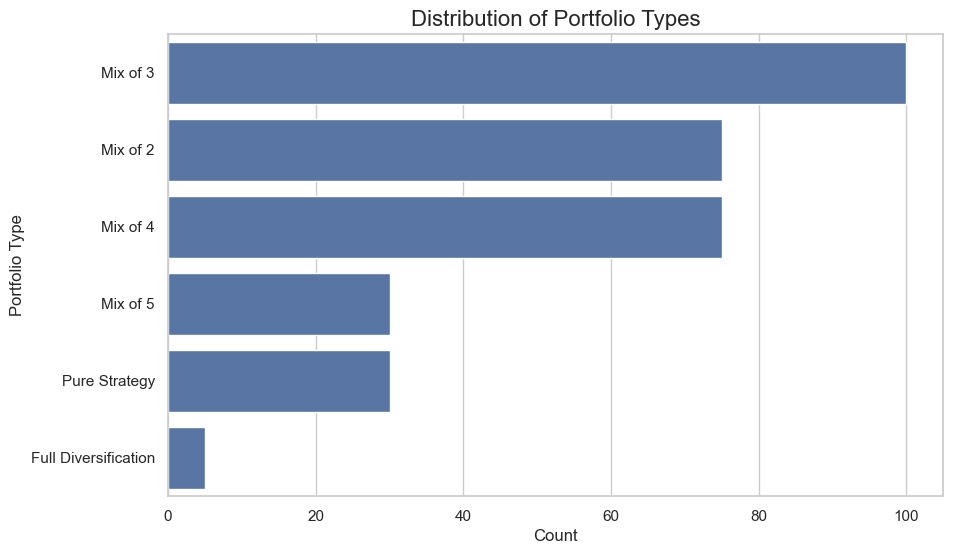

In [11]:
# Visualize the distribution of portfolio types
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=master_df, y='portfolio_type', order=master_df['portfolio_type'].value_counts().index)
plt.title('Distribution of Portfolio Types', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Portfolio Type', fontsize=12)
plt.show()


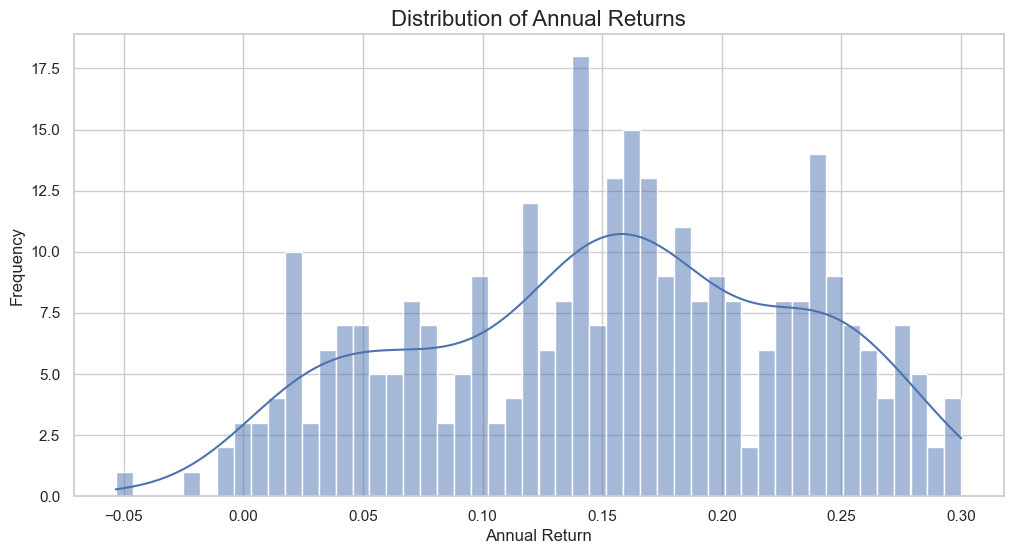

In [ ]:
# Visualize the distribution of annual returns
plt.figure(figsize=(12, 6))
sns.histplot(master_df['annual_return'].dropna(), kde=True, bins=50) # dropna() is important
plt.title('Distribution of Annual Returns', fontsize=16)
plt.xlabel('Annual Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()



--- Average Annual Return by Portfolio Type ---
                          mean    median       std  count
portfolio_type                                           
Full Diversification  0.175259  0.173000  0.083824      5
Mix of 2              0.144216  0.145000  0.080413     75
Mix of 3              0.152893  0.156500  0.077486    100
Mix of 4              0.161158  0.163000  0.075259     75
Mix of 5              0.167971  0.170628  0.076773     30
Pure Strategy         0.122279  0.118324  0.087906     30


C:\Users\irisd\AppData\Local\Temp\ipykernel_36452\2849319974.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(master_df.groupby('portfolio_type')['annual_return'].agg(['mean', 'median', 'std', 'count']))


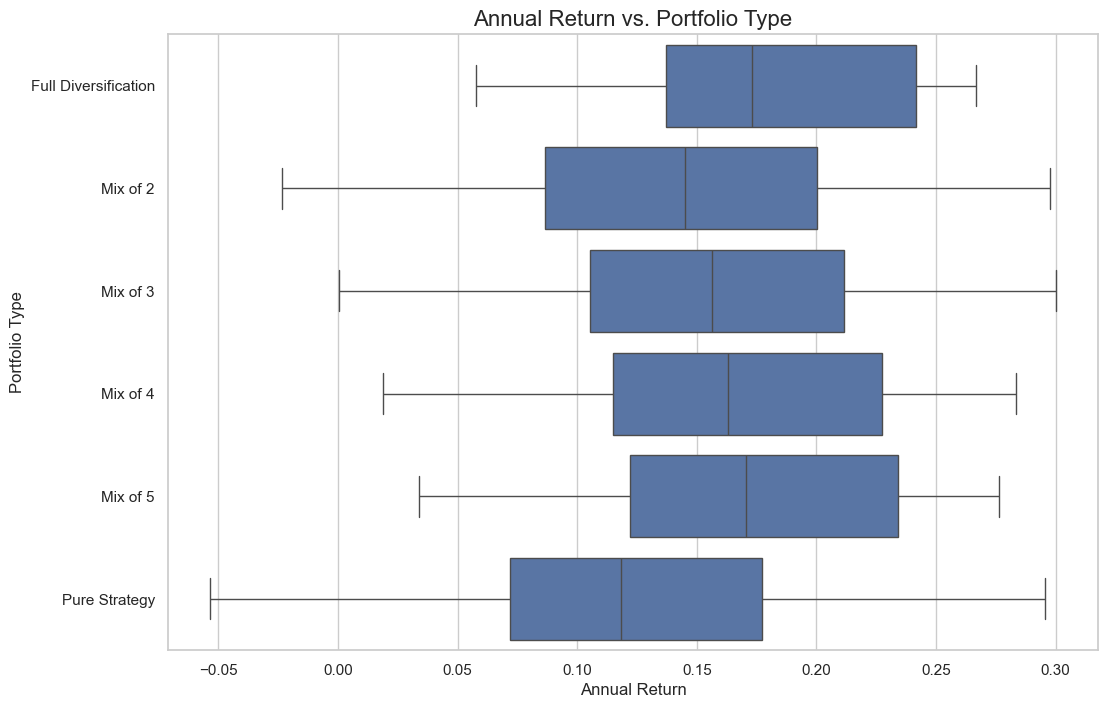

In [16]:
# Bi-variate analysis: Annual Return vs. Portfolio Type
# First, let's see the raw numbers with groupby
print("\n--- Average Annual Return by Portfolio Type ---")
print(master_df.groupby('portfolio_type')['annual_return'].agg(['mean', 'median', 'std', 'count']))

# A box plot is the best way to visualize this distribution
plt.figure(figsize=(12, 8))
sns.boxplot(data=master_df, x='annual_return', y='portfolio_type')
plt.title('Annual Return vs. Portfolio Type', fontsize=16)
plt.xlabel('Annual Return', fontsize=12)
plt.ylabel('Portfolio Type', fontsize=12)
plt.show()


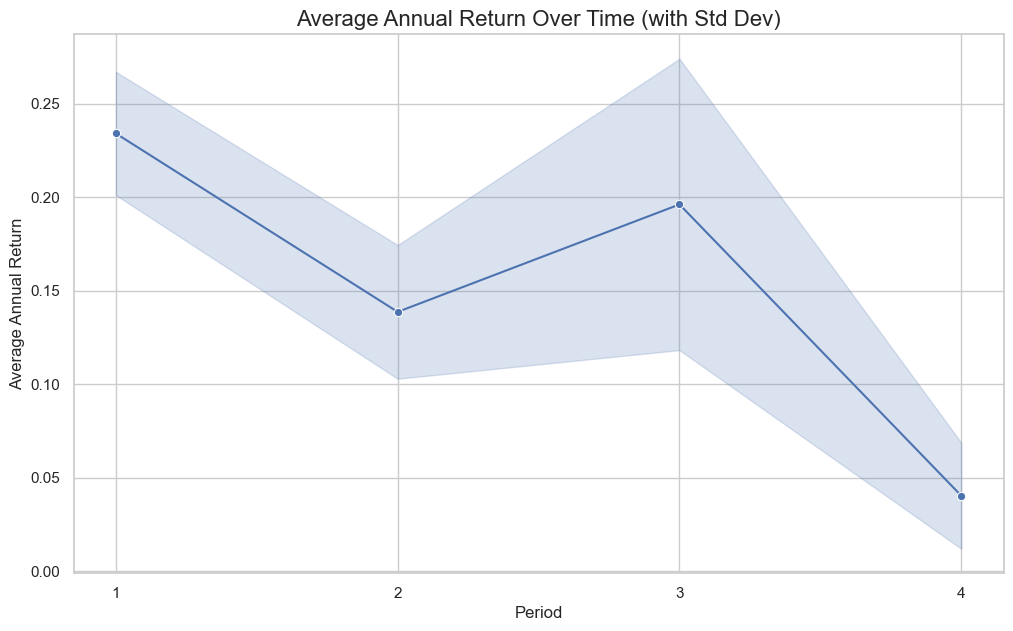

In [18]:
# Time Series Analysis: Average Annual Return Over Time

# We need to filter out the 'all period' data for a clean time series plot
time_series_df = master_df.dropna(subset=['period_numeric'])

plt.figure(figsize=(12, 7))
sns.lineplot(data=time_series_df, x='period_numeric', y='annual_return', marker='o', errorbar='sd')
plt.title('Average Annual Return Over Time (with Std Dev)', fontsize=16)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Average Annual Return', fontsize=12)
plt.xticks(time_series_df['period_numeric'].unique()) # Ensure clean integer ticks
plt.show()


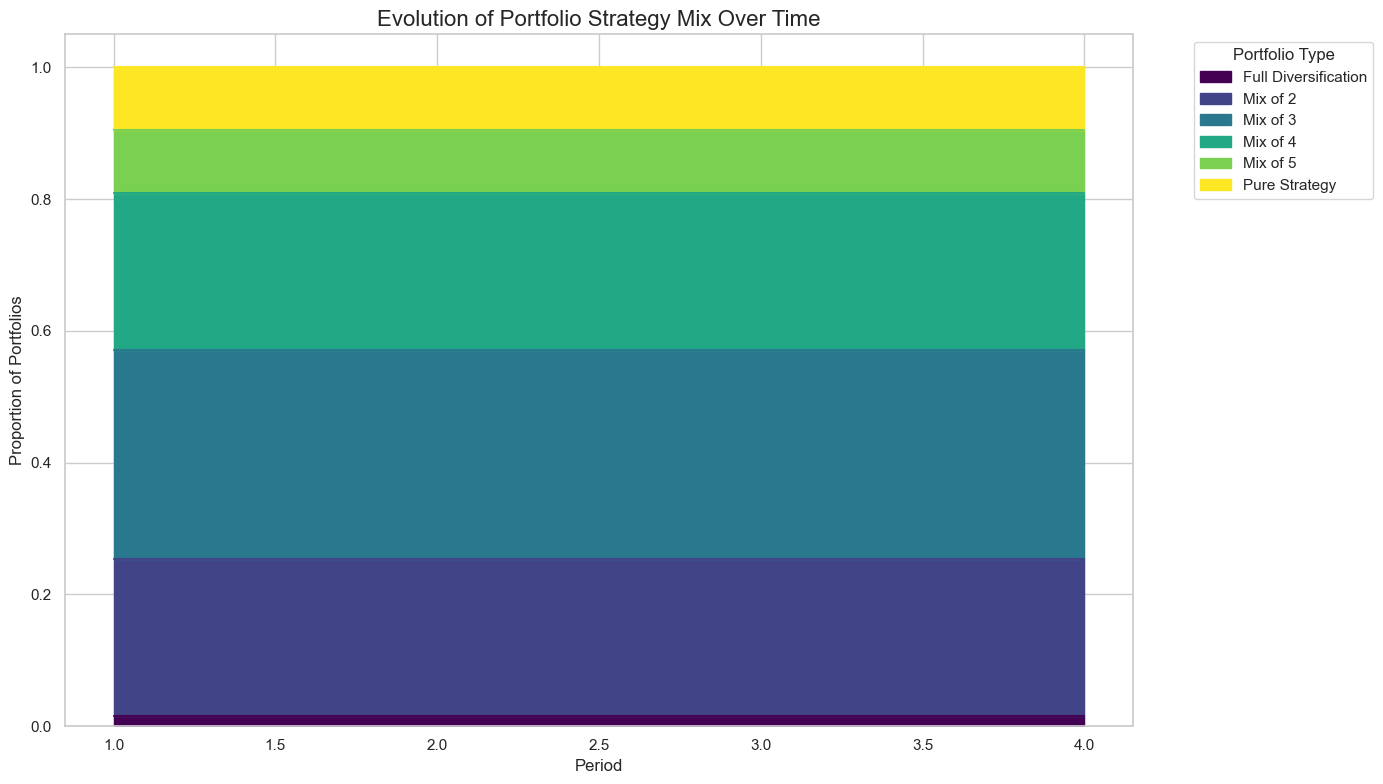

In [19]:
# Create a cross-tabulation of period and portfolio type
time_series_df = master_df.dropna(subset=['period_numeric'])
strategy_mix = pd.crosstab(
    index=time_series_df['period_numeric'],
    columns=time_series_df['portfolio_type'],
    normalize='index' # Normalize to get percentages for each period
)

# Plot as a 100% stacked area chart
strategy_mix.plot(
    kind='area',
    stacked=True,
    figsize=(14, 8),
    colormap='viridis'
)
plt.title('Evolution of Portfolio Strategy Mix Over Time', fontsize=16)
plt.xlabel('Period', fontsize=12)
plt.ylabel('Proportion of Portfolios', fontsize=12)
plt.legend(title='Portfolio Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


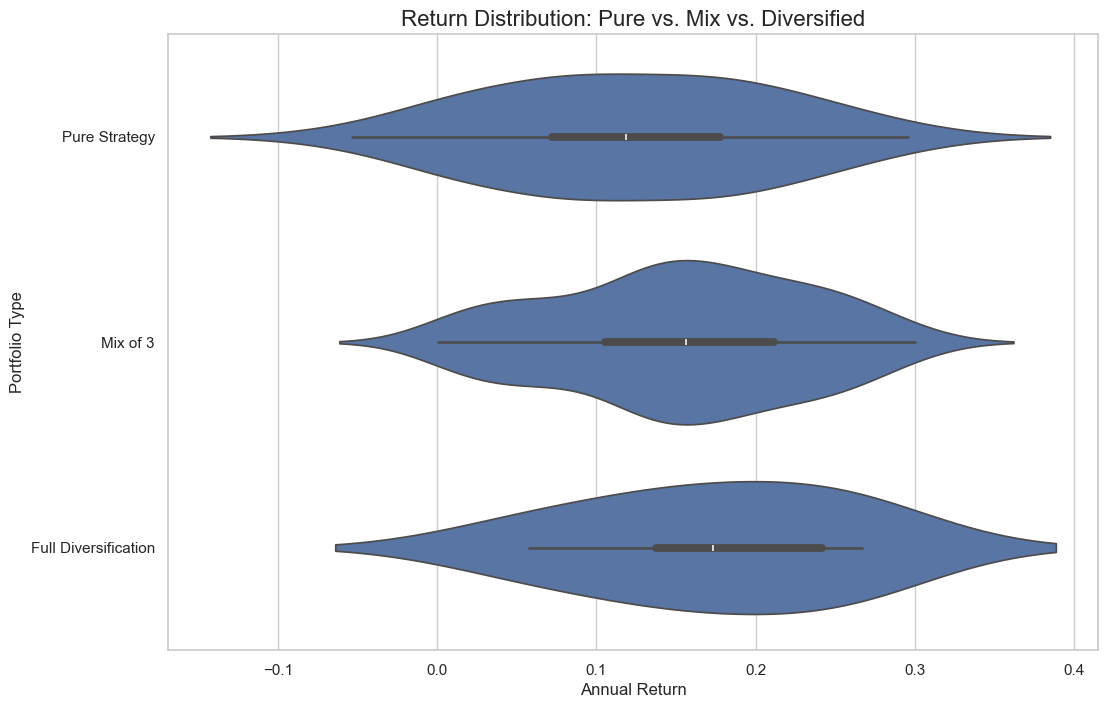

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent theme for plots
sns.set_theme(style="whitegrid")

# Filter the DataFrame to focus on the most interesting categories
comparison_df = master_df[master_df['portfolio_type'].isin(['Pure Strategy', 'Full Diversification', 'Mix of 3'])]

plt.figure(figsize=(12, 8))
sns.violinplot(data=comparison_df, x='annual_return', y='portfolio_type',
               order=['Pure Strategy', 'Mix of 3', 'Full Diversification'])
plt.title('Return Distribution: Pure vs. Mix vs. Diversified', fontsize=16)
plt.xlabel('Annual Return', fontsize=12)
plt.ylabel('Portfolio Type', fontsize=12)
plt.show()



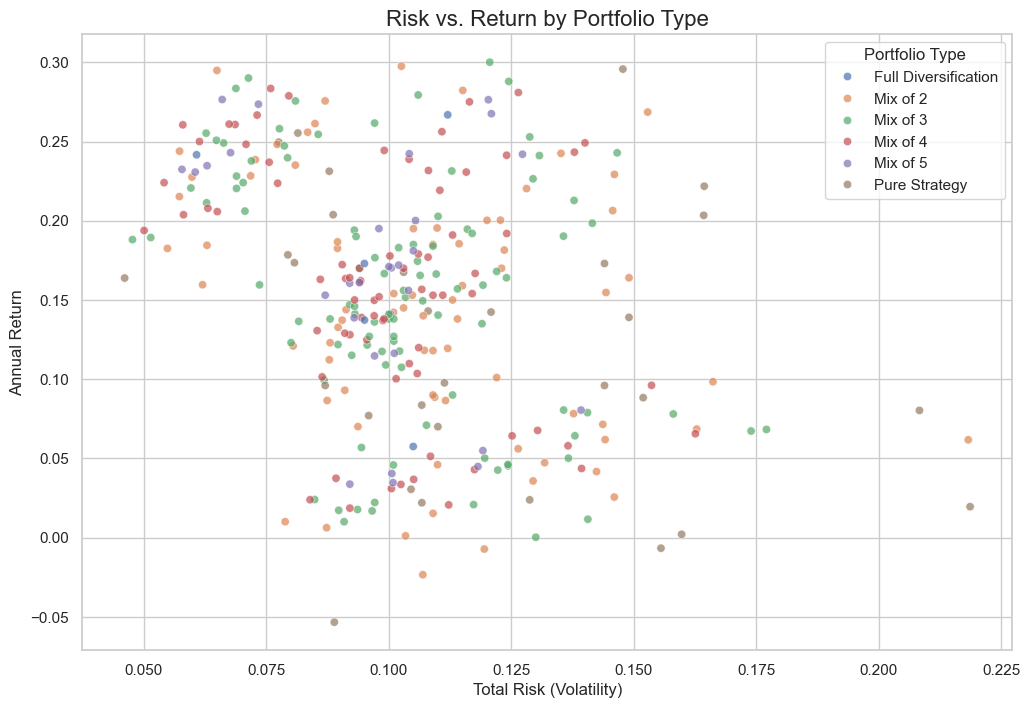

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=master_df, x='total_risk', y='annual_return', hue='portfolio_type', alpha=0.7)
plt.title('Risk vs. Return by Portfolio Type', fontsize=16)
plt.xlabel('Total Risk (Volatility)', fontsize=12)
plt.ylabel('Annual Return', fontsize=12)
plt.legend(title='Portfolio Type')
plt.show()


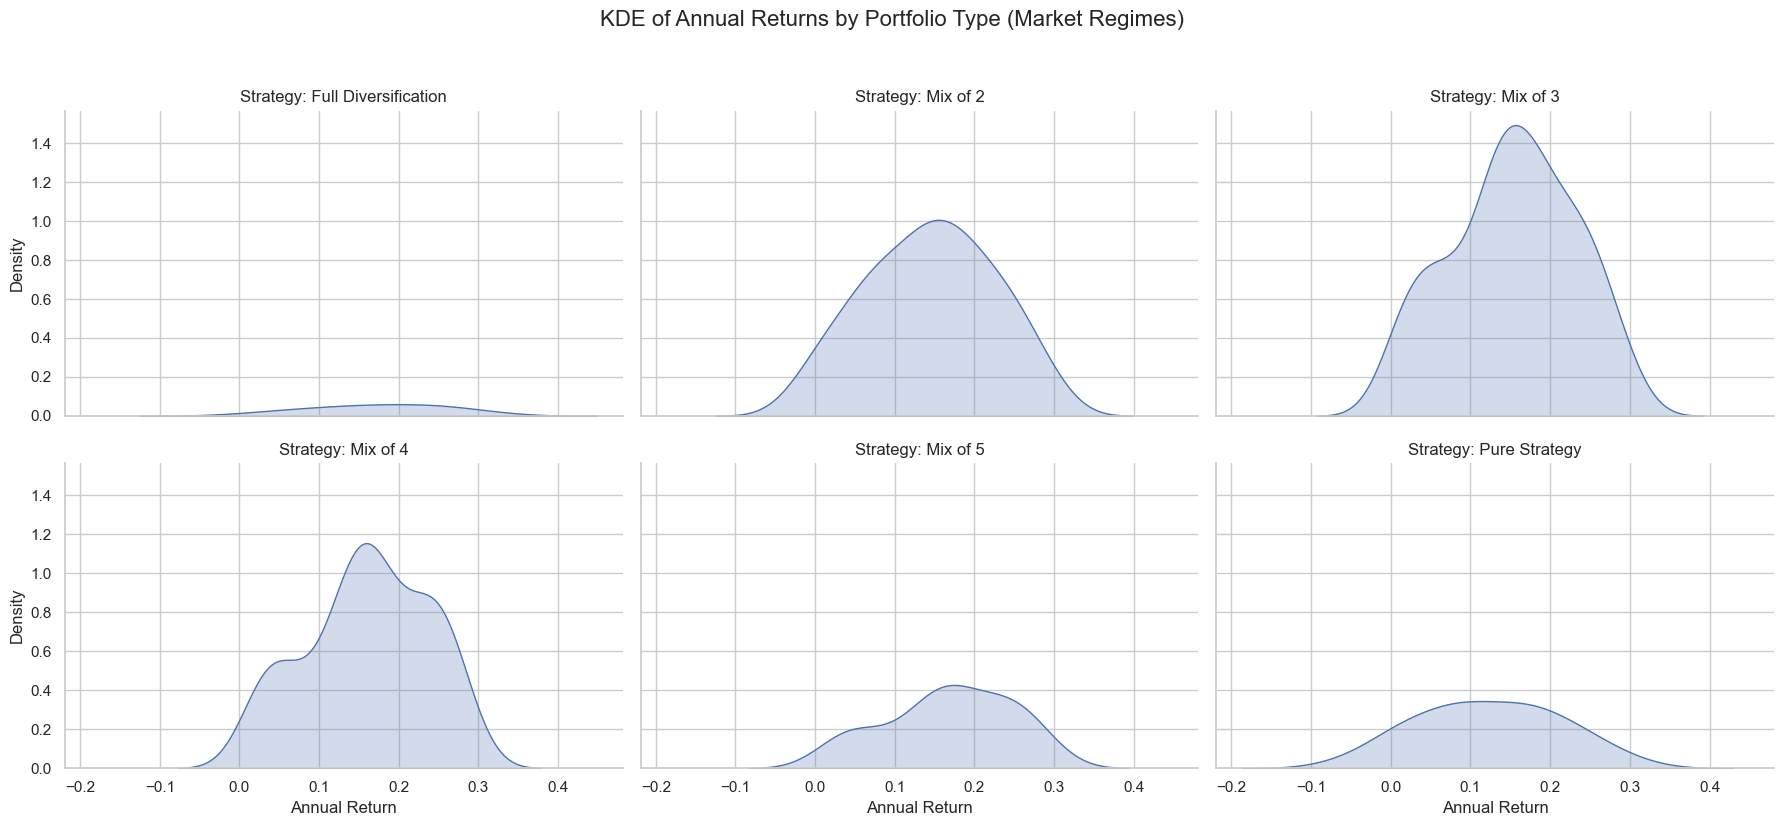

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you have the master_df from the previous steps
# sns.set_theme(style="whitegrid") # Optional: sets a nice visual theme

# Create a figure-level plot (displot) that automatically creates subplots (facets)
# We use col="portfolio_type" to create a column of plots for each category.
# col_wrap=3 tells seaborn to wrap to the next row after 3 plots to keep it tidy.
g = sns.displot(
    data=master_df, 
    x='annual_return', 
    col='portfolio_type',
    kind='kde',  # Specify that we want a Kernel Density Estimate plot
    col_wrap=3,  # Wrap the subplots after 3 columns
    fill=True,   # Fill the area under the curve for better visibility
    height=4,    # Height of each subplot
    aspect=1.5   # Aspect ratio of each subplot
)

# Add a clear overall title to the figure
g.fig.suptitle('KDE of Annual Returns by Portfolio Type (Market Regimes)', y=1.03, fontsize=16)

# Improve individual subplot titles and labels
g.set_titles("Strategy: {col_name}")
g.set_axis_labels("Annual Return", "Density")

plt.tight_layout()
plt.show()




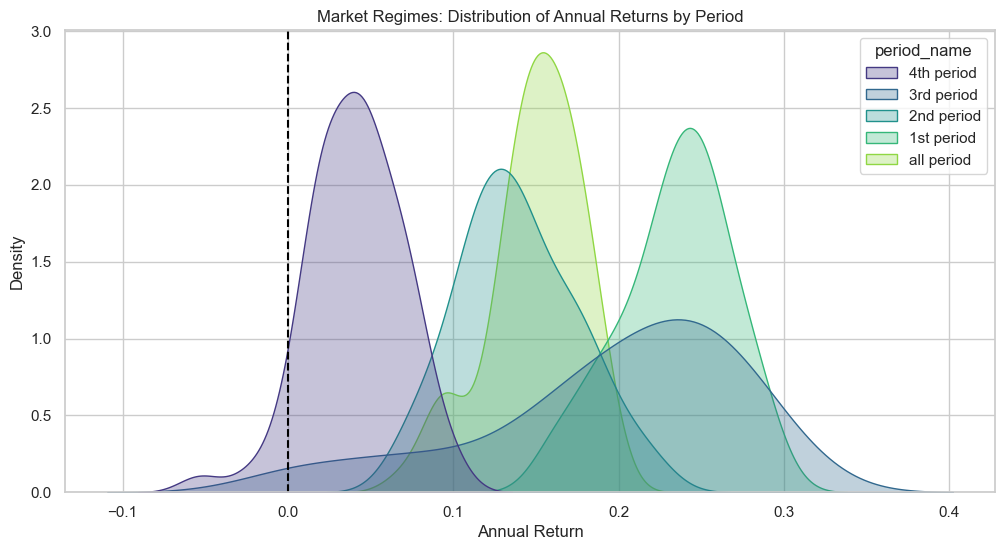

In [59]:
# A. Market Regime: Are returns getting better or worse?
plt.figure(figsize=(12, 6))
sns.kdeplot(
        data=master_df, 
        x='annual_return', 
        hue='period_name', 
        fill=True, 
        palette='viridis',
        alpha=0.3
    )
plt.title('Market Regimes: Distribution of Annual Returns by Period')
plt.xlabel('Annual Return')
plt.axvline(0, color='black', linestyle='--')
plt.show()



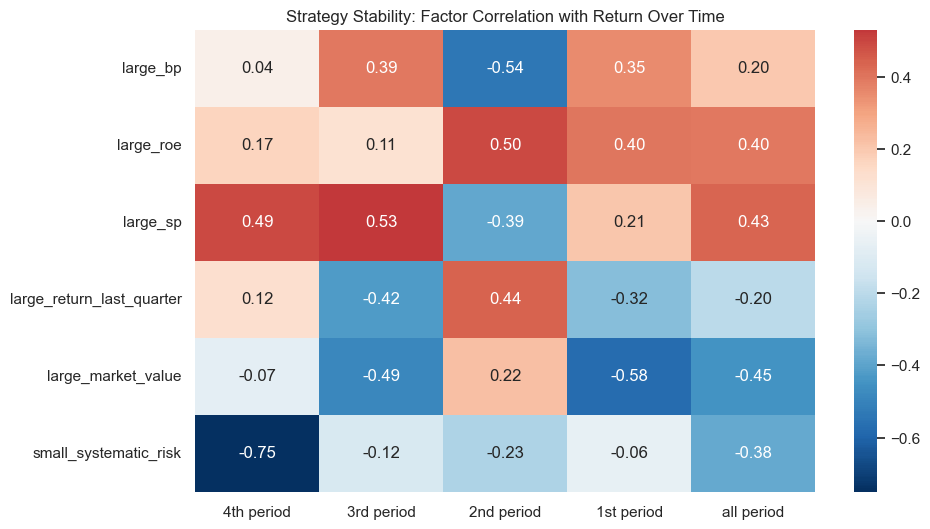

In [60]:

    # B. Strategy Stability: Which factors work in which period?
    # Calculate correlation between weights and return for each period
heatmap_data = pd.DataFrame()
for period in master_df['period_name'].unique():
        subset = master_df[master_df['period_name'] == period]
        # Correlation of strategies vs return
        corr = subset[weight_cols].corrwith(subset['annual_return'])
        heatmap_data[period] = corr

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='RdBu_r', center=0, fmt='.2f')
plt.title('Strategy Stability: Factor Correlation with Return Over Time')
plt.show()

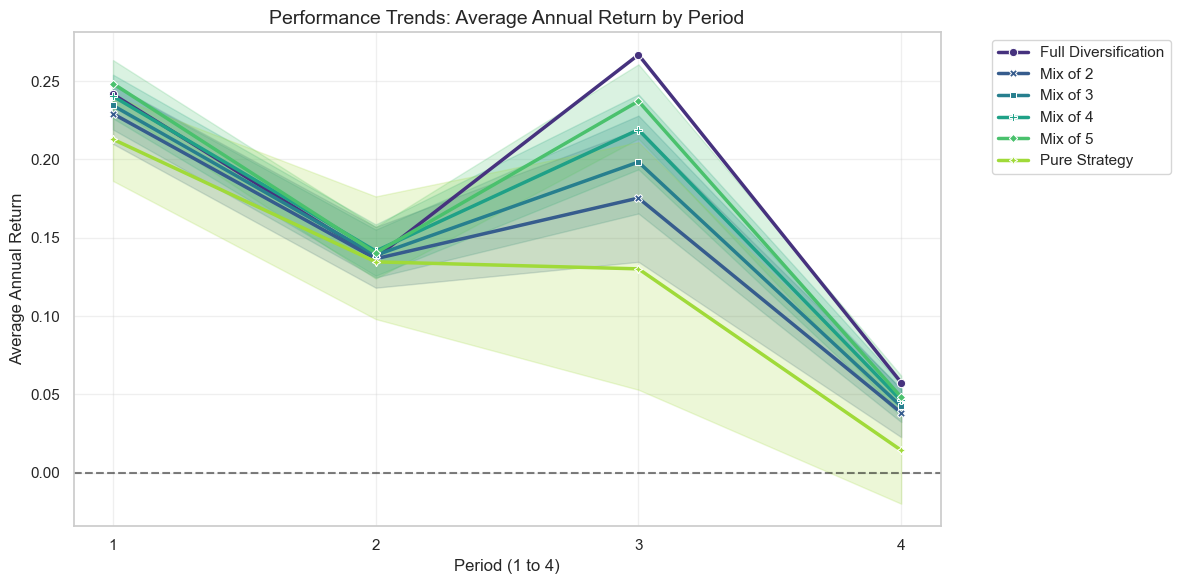

In [27]:
plt.figure(figsize=(12, 6))

# Lineplot automatically calculates the Mean and Confidence Interval
sns.lineplot(
    data=master_df,
    x='period_numeric',
    y='annual_return',
    hue='portfolio_type',
    style='portfolio_type', # Adds different line styles for clarity
    markers=True,           # Adds dots to the lines
    dashes=False,
    palette='viridis',
    linewidth=2.5
)

plt.title('Performance Trends: Average Annual Return by Period', fontsize=14)
plt.ylabel('Average Annual Return')
plt.xlabel('Period (1 to 4)')
plt.axhline(0, color='black', linestyle='--', alpha=0.5) # Zero line
plt.xticks([1, 2, 3, 4]) # Ensure x-axis only shows whole numbers
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

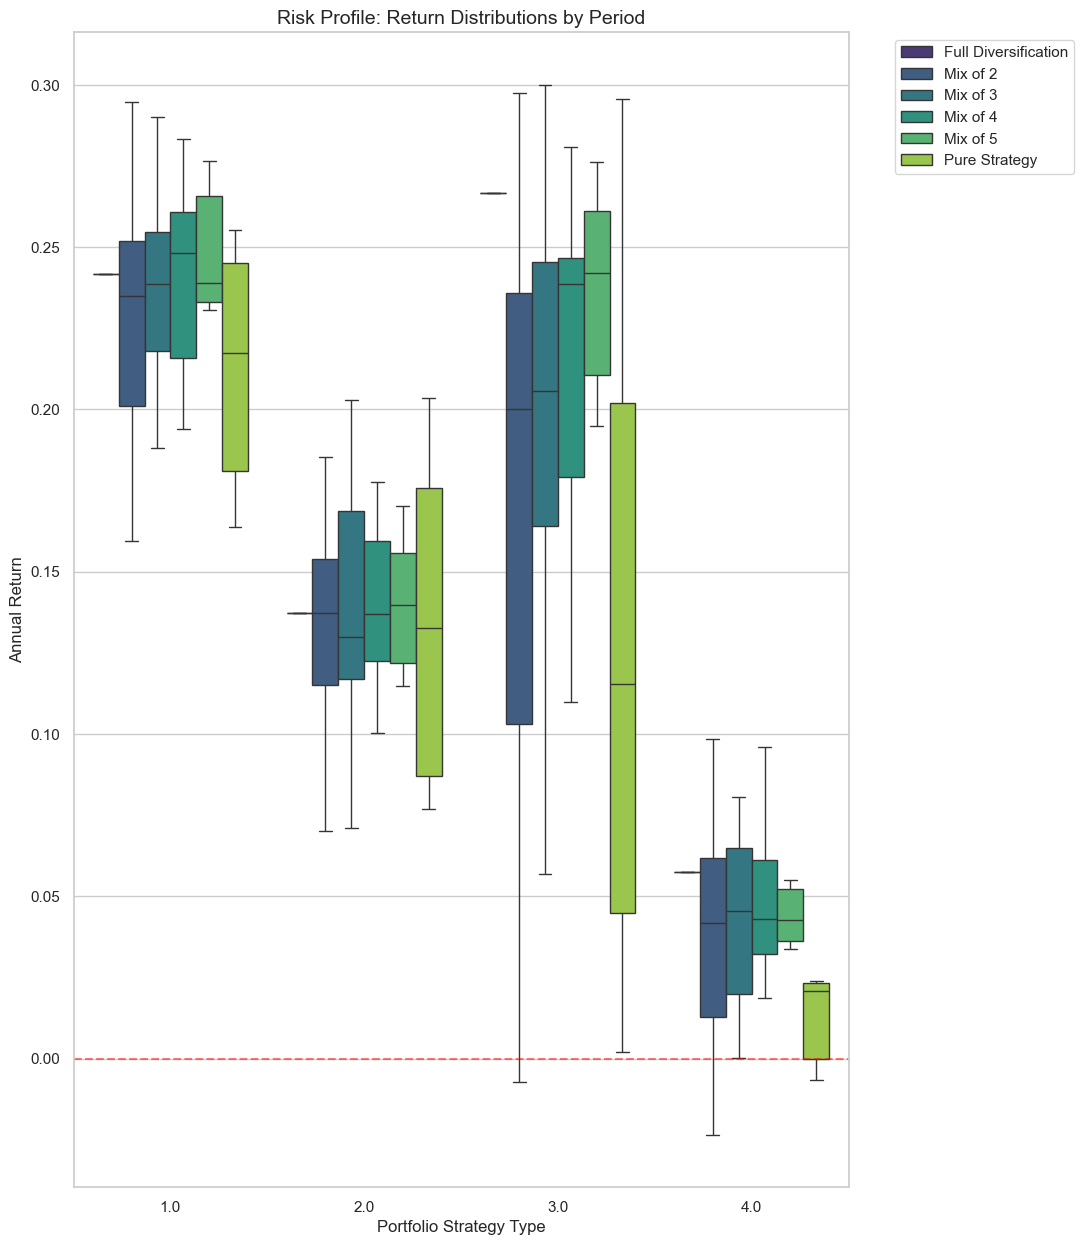

In [58]:
plt.figure(figsize=(10, 15))

    # A. The Box Plot (The summary)
ax = sns.boxplot( 
        data=master_df,
        x='period_numeric',
        y='annual_return',
        hue='portfolio_type',
        palette='viridis',
        showfliers=False
    )

plt.title('Risk Profile: Return Distributions by Period', fontsize=14)
plt.ylabel('Annual Return')
plt.xlabel('Portfolio Strategy Type')
plt.axhline(0, color='red', linestyle='--', alpha=0.5) # Zero line
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\irisd\AppData\Local\Temp\ipykernel_36452\812798556.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


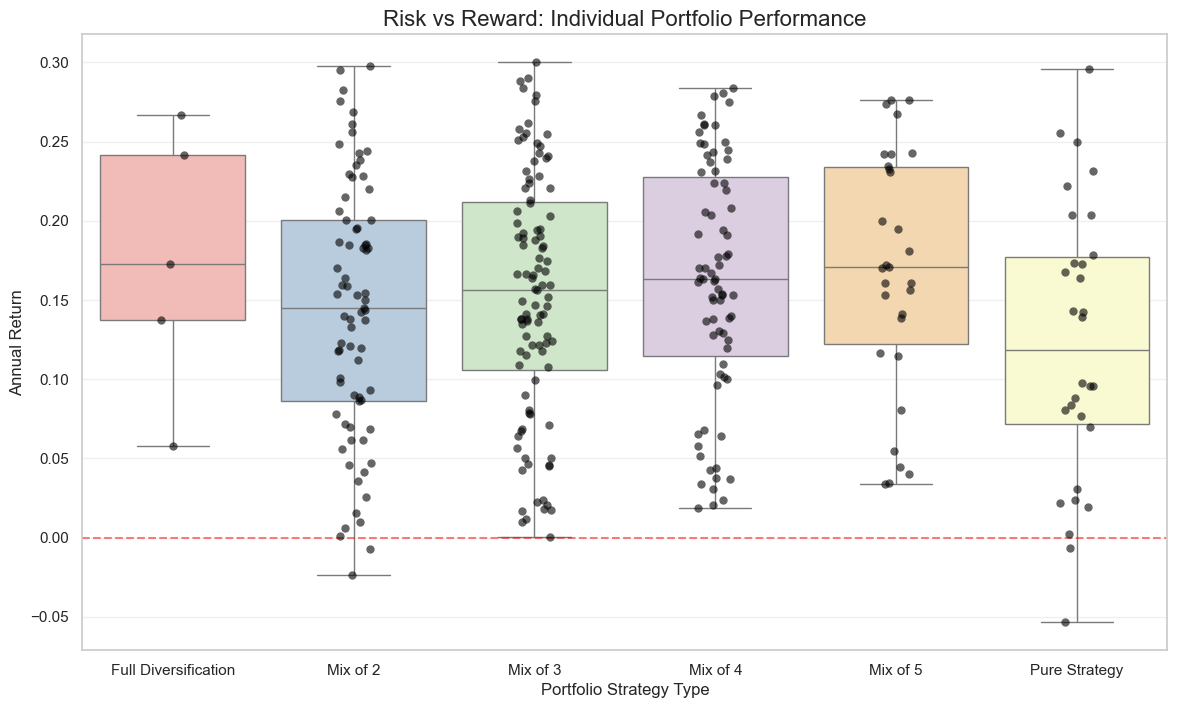

In [ ]:
# --- 4. VISUALIZATION ---
plt.figure(figsize=(14, 8))

    # A. The Box Plot (The summary)
ax = sns.boxplot(
        data=master_df, 
        x='portfolio_type', 
        y='annual_return', 
        palette='Pastel1', # Lighter colors so dots show up
        showfliers=False   # Hide outlier dots (stripplot will show them better)
    )

    # B. The Strip Plot (The actual dots - The FIX)
sns.stripplot(
        data=master_df,
        x='portfolio_type',
        y='annual_return',
        color='black',     # Make dots black to stand out
        alpha=0.6,         # Slight transparency
        jitter=True,       # Spread them out so they don't overlap
        size=6
    )

plt.title('Risk vs Reward: Individual Portfolio Performance', fontsize=16)
plt.ylabel('Annual Return')
plt.xlabel('Portfolio Strategy Type')
plt.axhline(0, color='red', linestyle='--', alpha=0.5)
plt.grid(True, axis='y', alpha=0.3)
plt.show()

In [62]:
from scipy.stats import f_oneway

# --- ANOVA Test ---
# ANOVA compares the means of two or more groups.
# Null Hypothesis (H0): The mean annual return is the same for all portfolio types.
# Alternative Hypothesis (H1): At least one portfolio type has a different mean annual return.

# Create a list of the return series for each portfolio type
portfolio_groups = master_df.groupby('portfolio_type')['annual_return'].apply(list)

# The f_oneway function takes each group's data as a separate argument, so we unpack the list
f_statistic, p_value = f_oneway(*portfolio_groups)

print(f"--- ANOVA Test for Annual Return across Portfolio Types ---")
print(f"F-Statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # Standard significance level
if p_value < alpha:
    print("\nConclusion: The p-value is less than 0.05. We reject the null hypothesis.")
    print("There is a statistically significant difference in mean annual returns among the portfolio types.")
else:
    print("\nConclusion: The p-value is greater than 0.05. We fail to reject the null hypothesis.")
    print("There is not enough evidence to say the mean annual returns are different among the portfolio types.")


--- ANOVA Test for Annual Return across Portfolio Types ---
F-Statistic: 1.5405
P-value: 0.1769

Conclusion: The p-value is greater than 0.05. We fail to reject the null hypothesis.
There is not enough evidence to say the mean annual returns are different among the portfolio types.


C:\Users\irisd\AppData\Local\Temp\ipykernel_36452\851328182.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  portfolio_groups = master_df.groupby('portfolio_type')['annual_return'].apply(list)


C:\Users\irisd\AppData\Local\Temp\ipykernel_36452\2461010587.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=strategy_frequency.values, y=strategy_frequency.index, palette='viridis')


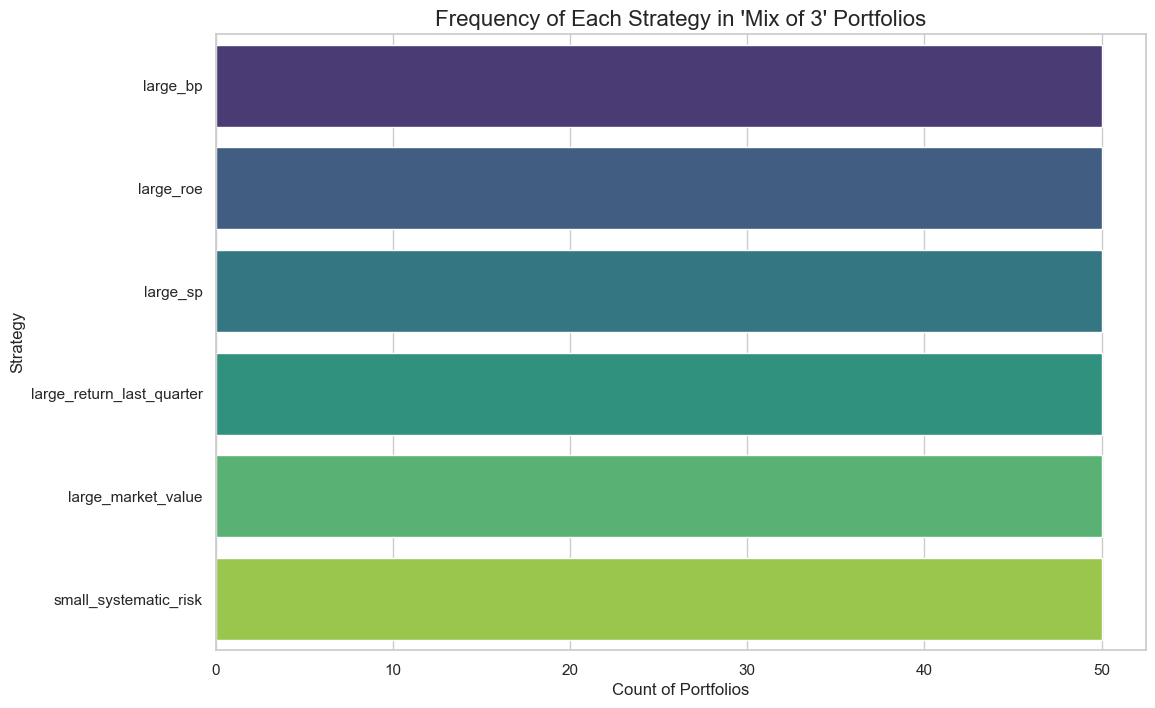


--- Strategy Frequency in 'Mix of 3' Portfolios ---
large_bp                     50
large_roe                    50
large_sp                     50
large_return_last_quarter    50
large_market_value           50
small_systematic_risk        50
dtype: int64


In [63]:
# Filter for portfolios that are a 'Mix of 3'
mix_of_3_df = master_df[master_df['portfolio_type'] == 'Mix of 3'].copy()

# These are your strategy weight columns
weight_cols = [
    'large_bp', 'large_roe', 'large_sp', 
    'large_return_last_quarter', 'large_market_value', 'small_systematic_risk'
]

# For each row, find which of the weight columns are non-zero (i.e., active)
# The result is a boolean DataFrame (True if the strategy is active)
active_strategies = mix_of_3_df[weight_cols] > 0

# Sum up the 'True' values for each column to get the frequency count
strategy_frequency = active_strategies.sum().sort_values(ascending=False)

# --- Visualize the results ---
plt.figure(figsize=(12, 8))
sns.barplot(x=strategy_frequency.values, y=strategy_frequency.index, palette='viridis')
plt.title("Frequency of Each Strategy in 'Mix of 3' Portfolios", fontsize=16)
plt.xlabel('Count of Portfolios', fontsize=12)
plt.ylabel('Strategy', fontsize=12)
plt.show()

print("\n--- Strategy Frequency in 'Mix of 3' Portfolios ---")
print(strategy_frequency)
